In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#dropping all the columns with too much missing data (more than 80% of data is missing)
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

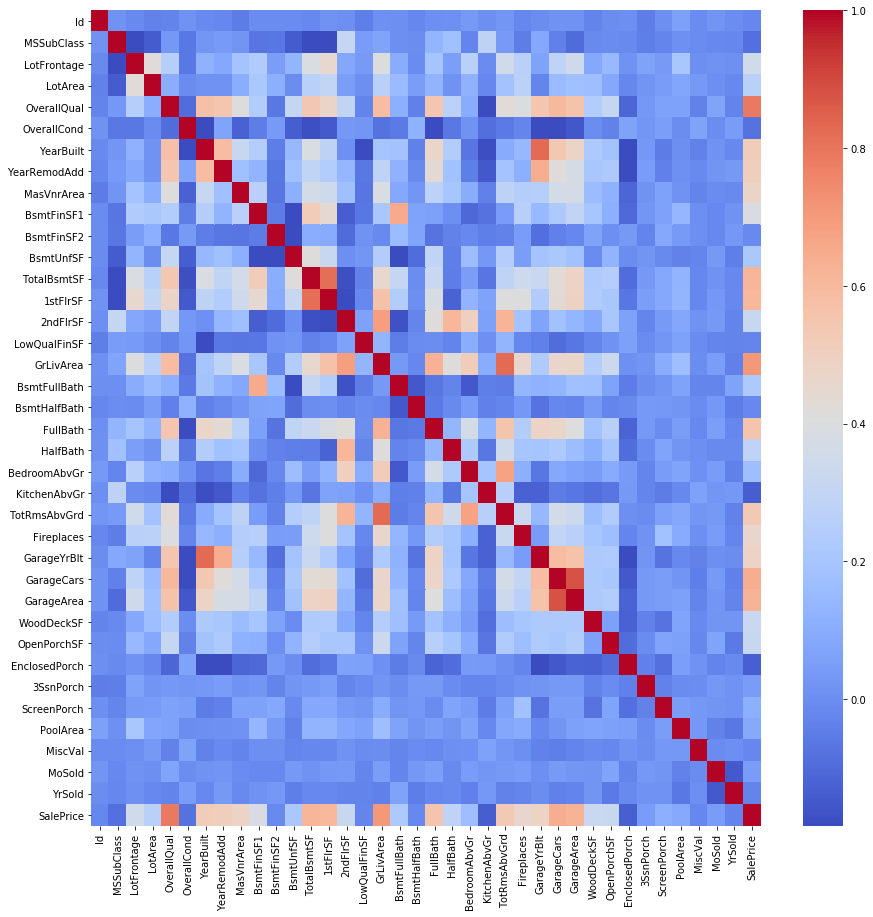

In [7]:
#creating a heatmap to check which columns affect the house's price the most
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,15))

hmap = sns.heatmap(corr, cmap='coolwarm', robust=True, ax=ax)

In [8]:
#creating a new dataframe with the most valueable features
updated_df = df[['MSZoning','Street' ,'LandContour','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt','YearRemodAdd','Foundation','BsmtCond','TotalBsmtSF','Heating','HeatingQC','CentralAir',
                'Electrical', '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                'HalfBath','Functional','Fireplaces','GarageType', 'GarageYrBlt','GarageArea','GarageQual','MiscVal','MoSold',
                'YrSold','SaleType','SaleCondition','SalePrice']].copy()

In [9]:
updated_df.head(10)

,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageType,GarageYrBlt,GarageArea,GarageQual,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,2003.0,548,TA,0,2,2008,WD,Normal,208500
1,RL,Pave,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,Attchd,1976.0,460,TA,0,5,2007,WD,Normal,181500
2,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,2001.0,608,TA,0,9,2008,WD,Normal,223500
3,RL,Pave,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Detchd,1998.0,642,TA,0,2,2006,WD,Abnorml,140000
4,RL,Pave,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Attchd,2000.0,836,TA,0,12,2008,WD,Normal,250000
5,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,...,Attchd,1993.0,480,TA,700,10,2009,WD,Normal,143000
6,RL,Pave,Lvl,AllPub,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,Attchd,2004.0,636,TA,0,8,2007,WD,Normal,307000
7,RL,Pave,Lvl,AllPub,Gtl,NWAmes,PosN,Norm,1Fam,2Story,...,Attchd,1973.0,484,TA,350,11,2009,WD,Normal,200000
8,RM,Pave,Lvl,AllPub,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,...,Detchd,1931.0,468,Fa,0,4,2008,WD,Abnorml,129900
9,RL,Pave,Lvl,AllPub,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,...,Attchd,1939.0,205,Gd,0,1,2008,WD,Normal,118000


In [10]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   LandContour    1460 non-null   object 
 3   Utilities      1460 non-null   object 
 4   LandSlope      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   Condition1     1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  Foundation     1460 non-null   object 
 15  BsmtCond       1423 non-null   object 
 16  TotalBsmtSF    1460 non-null   int64  
 17  Heating        1460 non-null   object 
 18  HeatingQ

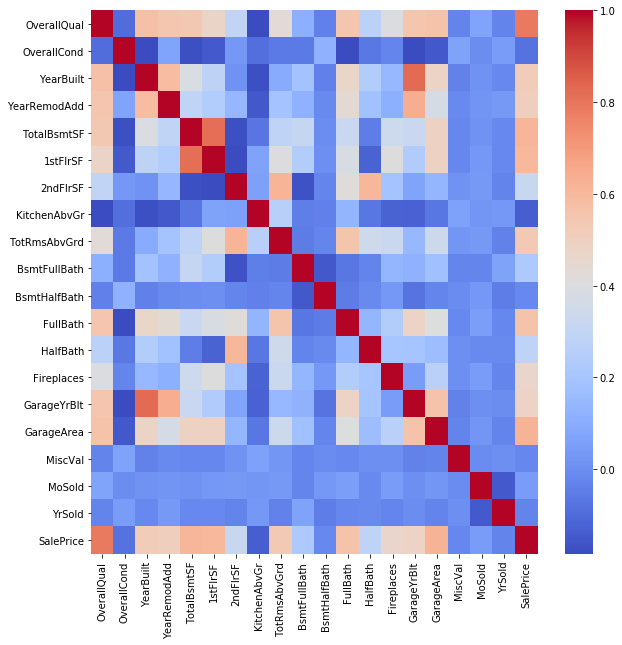

In [11]:
#creating a heatmap to check which columns affect the house's price the most
corr = updated_df.corr()

fig, ax = plt.subplots(figsize=(10,10))

hmap1 = sns.heatmap(corr, cmap='coolwarm', robust=True, ax=ax)

### create new columns: 
1. TotalSF=(TotalBsmtSF + 1stFlrSF + 2ndFlrSF + GarageArea + OpenPorchSF + EnclosedPorch + WoodDeckSF + 3SsnPorch + ScreenPorch + PoolArea).
2. TotalBaths=(BsmtFullBath + BsmtHalfBath + FullBath + HalfBath).
3. HouseAgeOnSell = (YrSold - YearBuilt).

### Rename columns: TotalRooms = (TotRmsAbvGrd)

In [12]:
#Renaming a column
updated_df.rename(columns={'TotRmsAbvGrd':'TotalRooms'}, inplace=True)

### creating TotalSF

In [13]:
#creating a numpy array with total house size(SF) for each house(ID)
TotalHouseSF = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['WoodDeckSF'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']
TotalHouseSF = np.array(TotalHouseSF)

#dropping the irrelevant columns
updated_df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea'], axis=1, inplace=True)

#inserting the new 'TotalHouseSF' column
updated_df.insert(10, 'TotalHouseSizeSF', TotalHouseSF)

### creating TotalBaths

In [14]:
#creating a numpy array with total bathrooms for each house
TotalBathRooms = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
TotalBathRooms = np.array(TotalBathRooms)

#deleting the irrelevant columns
updated_df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1, inplace=True)

#inserting the new 'TotalBathRooms' column
updated_df.insert(24, 'TotalBathRooms', TotalBathRooms)

### creating HouseAgeOnSell

In [15]:
#creating a numpy array with total bathrooms for each house
HouseAgeOnSell = df['YrSold'] - df['YearBuilt']
HouseAgeOnSell = np.array(HouseAgeOnSell)

#deleting the irrelevant columns
updated_df.drop(['YrSold','YearBuilt', 'MoSold'], axis=1, inplace=True)

#inserting the new 'HouseAgeOnSell' column
updated_df.insert(28, 'HouseAgeOnSell', HouseAgeOnSell)

In [16]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSZoning          1460 non-null   object 
 1   Street            1460 non-null   object 
 2   LandContour       1460 non-null   object 
 3   Utilities         1460 non-null   object 
 4   LandSlope         1460 non-null   object 
 5   Neighborhood      1460 non-null   object 
 6   Condition1        1460 non-null   object 
 7   Condition2        1460 non-null   object 
 8   BldgType          1460 non-null   object 
 9   HouseStyle        1460 non-null   object 
 10  TotalHouseSizeSF  1460 non-null   int64  
 11  OverallQual       1460 non-null   int64  
 12  OverallCond       1460 non-null   int64  
 13  YearRemodAdd      1460 non-null   int64  
 14  Foundation        1460 non-null   object 
 15  BsmtCond          1423 non-null   object 
 16  Heating           1460 non-null   object 


### Few more column modifications

In [17]:
updated_df.drop(['MiscVal'],axis=1, inplace=True)
updated_df.rename(columns={'KitchenAbvGr':'TotalKitchens'}, inplace=True)

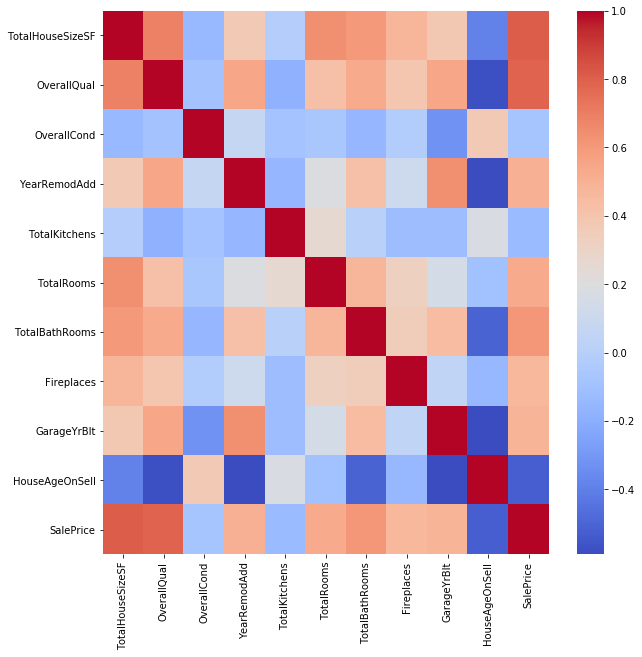

In [18]:
#creating a heatmap to check which columns affect the house's price the most
corr = updated_df.corr()

fig, ax = plt.subplots(figsize=(10,10))

hmap = sns.heatmap(corr, cmap='coolwarm', robust=True, ax=ax)

In [19]:
#Adding 'AgeBeforeRemodel' column
AgeBeforeRemodel = df['YearRemodAdd'] - df['YearBuilt']
AgeBeforeRemodel = np.array(AgeBeforeRemodel)

#Adding the new column
updated_df.insert(10, 'AgeBeforeRemodel', AgeBeforeRemodel)

In [20]:
#Dropping the irrelevant column
updated_df.drop(['HouseAgeOnSell'], axis=1, inplace=True)

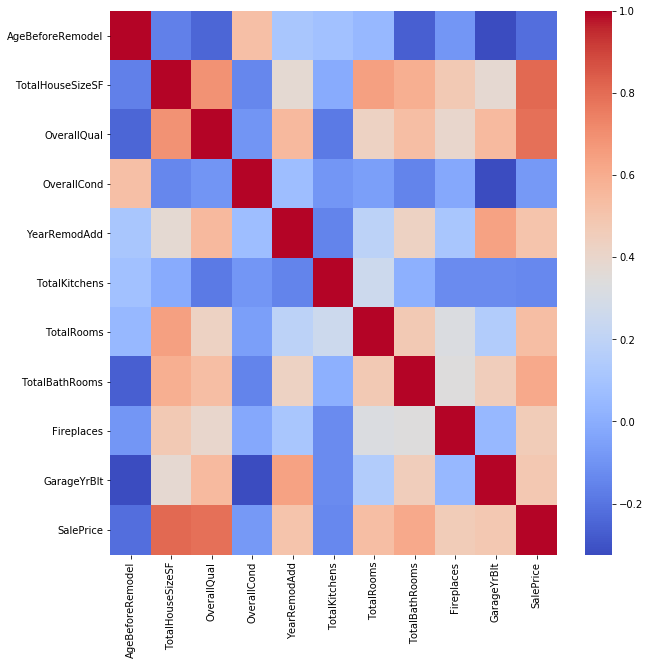

In [21]:
#creating a heatmap to check which columns affect the house's price the most
corr = updated_df.corr()

fig, ax = plt.subplots(figsize=(10,10))

hmap = sns.heatmap(corr, cmap='coolwarm', robust=True, ax=ax)

### Setting the data type of categorical columns to 'category'

In [22]:
updated_df[updated_df.select_dtypes(['object']).columns] = updated_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [23]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSZoning          1460 non-null   category
 1   Street            1460 non-null   category
 2   LandContour       1460 non-null   category
 3   Utilities         1460 non-null   category
 4   LandSlope         1460 non-null   category
 5   Neighborhood      1460 non-null   category
 6   Condition1        1460 non-null   category
 7   Condition2        1460 non-null   category
 8   BldgType          1460 non-null   category
 9   HouseStyle        1460 non-null   category
 10  AgeBeforeRemodel  1460 non-null   int64   
 11  TotalHouseSizeSF  1460 non-null   int64   
 12  OverallQual       1460 non-null   int64   
 13  OverallCond       1460 non-null   int64   
 14  YearRemodAdd      1460 non-null   int64   
 15  Foundation        1460 non-null   category
 16  BsmtCond          1423 n

### Handling Missing Data

In [24]:
updated_df['BsmtCond'] = updated_df['BsmtCond'].cat.add_categories('NB') #adding NB = No Basement as a category value
updated_df['BsmtCond'].fillna(value='NB', inplace=True) 

updated_df['Electrical'].fillna(value='SBrkr', inplace=True) #SBrkr = the most common used electrical system according to the data

updated_df['GarageType'] = updated_df['GarageType'].cat.add_categories('NG') #adding NG = No Garage as a category value
updated_df['GarageQual'] = updated_df['GarageQual'].cat.add_categories('NG')
updated_df['GarageType'].fillna(value='NG', inplace=True) 
updated_df['GarageQual'].fillna(value='NG', inplace=True)

updated_df['GarageYrBlt'].fillna(value=-1, inplace=True) # year built = 0 (No garage)

In [25]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSZoning          1460 non-null   category
 1   Street            1460 non-null   category
 2   LandContour       1460 non-null   category
 3   Utilities         1460 non-null   category
 4   LandSlope         1460 non-null   category
 5   Neighborhood      1460 non-null   category
 6   Condition1        1460 non-null   category
 7   Condition2        1460 non-null   category
 8   BldgType          1460 non-null   category
 9   HouseStyle        1460 non-null   category
 10  AgeBeforeRemodel  1460 non-null   int64   
 11  TotalHouseSizeSF  1460 non-null   int64   
 12  OverallQual       1460 non-null   int64   
 13  OverallCond       1460 non-null   int64   
 14  YearRemodAdd      1460 non-null   int64   
 15  Foundation        1460 non-null   category
 16  BsmtCond          1460 n

### Saving the new dataframe

In [26]:
updated_df.to_csv('new_train.csv')